In [2]:
from myio import *

main_dir = Path('out_small')
#tools = ['mm2-fast', 'winnowmap']
#tools = ['shmap-k25-r0.05-t0.4-diff0.05', 'minimap', 'blend', 'mapquik', 'mm2-fast', 'winnowmap'] #, ['shmap-k25-r0.05-t0.4-diff2', 'shmap-k25-r0.05-t0.4-diff0.02', 'shmap-k25-r0.05-t0.4-diff0.15', 'blend'] #, 'shmap-diff0.02', 'shmap-diff0.1'] #, 'blend', 'winnowmap', 'minimap', 'mapquik', 'mm2-fast'] #, 'shmap-diff0.15', 'shmap-diff0.02', 'shmap'] #, 'shmap-MIN_DIFF-002']  # 'shmap-noprune',  'shmap-k25-r0.05-t0.4-diff0.15', 'shmap-k25-r0.05-t0.5-diff0.1'
#tools = ['shmap-k25-r0.05-t0.4-diff0.05',
#         'shmap-k25-r0.03-t0.5-diff0.05',
#         'shmap-k25-r0.05-t0.5-d0.15-o0.1-mfixed_C',
#         'shmap-k25-r0.05-t0.5-d0.15-o0.1-mbucket_SH',    
#         'shmap-k25-r0.05-t0.5-d0.15-o0.1-mbucket_LCS',    
#         'blend'] #['minimap']#, , 'shmap-k25-r0.05-t0.4-diff0.02']
tools = [
         'mapquik',
         'winnowmap',
         'minimap',
         'mm2-fast',
         'blend',
         'mashmap',
         #'shmap-k25-r0.01-t0.35-d0.075-o0.3-mbucket_LCS',
         #'shmap-k25-r0.01-t0.4-d0.2-o0.3-mContainment',
         'shmap-k25-r0.01-t0.4-d0.2-o0.3-mbucket_LCS',
         'shmap-k25-r0.01-t0.35-d0.075-o0.3-mJaccard',
         'shmap-k25-r0.01-t0.35-d0.075-o0.3-mfixed_C',
         'shmap-k25-r0.01-t0.4-d0.075-o0.3-mfixed_C',
         #'shmap-k25-r0.01-t0.4-d0.05-o0.3-mfixed_C',
         #'shmap-k25-r0.01-t0.4-d0.05-o0.2-mfixed_C',
         #'shmap-k25-r0.01-t0.4-d0.1-o0.2-mfixed_C',
         #'shmap-k25-r0.01-t0.5-d0.15-o0.1-mfixed_C',
         #'shmap-k25-r0.01-t0.5-d0.15-o0.1-mbucket_LCS',    
         #'shmap-k25-r0.01-t0.5-d0.15-o0.1-mbucket_SH',    
         #'shmap-k25-r0.01-t0.4-d0.15-o0.1-mfixed_C',
         #'shmap-k25-r0.01-t0.4-d0.15-o0.1-mbucket_SH',    
         #'shmap-k25-r0.01-t0.4-d0.15-o0.1-mbucket_LCS',    
         #'shmap-k25-r0.005-t0.4-d0.15-o0.1-mfixed_C',
         #'shmap-k29-r0.01-t0.4-d0.075-o0.1-mfixed_C',
         #'shmap-k25-r0.01-t0.4-d0.05-o0.1-mfixed_C',
         #'shmap-k23-r0.01-t0.4-d0.075-o0.1-mfixed_C',
         #'shmap-k25-r0.005-t0.35-d0.075-o0.3-mfixed_C',
         ] #['minimap']#, , 'shmap-k25-r0.05-t0.4-diff0.02']
experiments = [
    ('chrY',  'chrY-readschrY-a?-d2-l?'),
#    ('chm13', 'chm13-readshg002-a?-d1-l?'),
#    ('chm13', 'chm13-readschm13-a?-d1-l?'),
#    ('chm13', 'HG002_small'),
]

pd.set_option('display.width', 100)
css = """ <style> table { font-family: "Courier New", Courier, monospace; } </style> """
display(HTML(css))
dfs = []
keys = []
for refname, data in experiments:
    df = get_comparison_table(main_dir=main_dir, refname=refname, experiment=data, tools=tools).round(2)
    dfs.append(df)
    keys.append(data)
    df_styled = (
        df.style
        .set_caption(data)
        .set_table_styles( [{ 'selector': '.index_name, .row_heading', 'props': [('text-align', 'left')] }] )
        #.apply(highlight_min, subset=pd.IndexSlice[:, :]))
        #.apply(highlight_min, subset=pd.IndexSlice[:, df.columns.difference(['Mapped Q60'])])
        #.apply(highlight_max, subset=pd.IndexSlice[:, ['Mapped Q60']])
    )
    display(df_styled)
DF = pd.concat(dfs, keys=keys)
#display(DF)
DF.to_latex('evals-table.tex', escape=True, multirow=False)

Computing mashmap for chrY-readschrY-a?-d2-l?...
An error occurred while reading PAF out_small/mashmap/chrY-readschrY-a?-d2-l?/mashmap: list index out of range


,Mapped Q60,Q<60 or missed,Wrong Q60,Index [sec],Map [sec],Memory [GB]
mapquik,41,99.5%,32,0.4,0.8,2.1
winnowmap,3056,63.0%,0,4.4,5280.7,3.1
minimap,2733,66.9%,0,1.5,396.4,0.3
mm2-fast,2733,66.9%,0,1.4,391.3,0.3
blend,4097,50.4%,3,0.8,125.9,0.2
shmap-k25-r0.01-t0.4-d0.2-o0.3-mbucket_LCS,8248,0.2%,922,0.2,23.7,0.2
shmap-k25-r0.01-t0.35-d0.075-o0.3-mJaccard,4531,45.2%,4,0.2,34.0,0.2
shmap-k25-r0.01-t0.35-d0.075-o0.3-mfixed_C,3822,53.8%,0,0.2,15.2,0.2
shmap-k25-r0.01-t0.4-d0.075-o0.3-mfixed_C,3821,53.8%,0,0.2,13.5,0.2


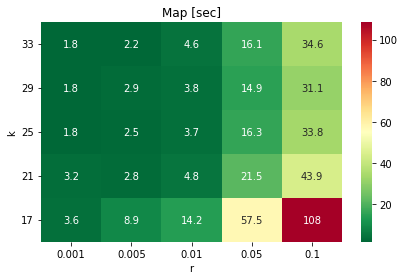

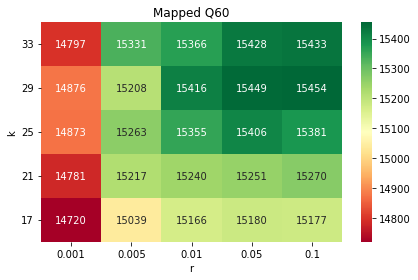

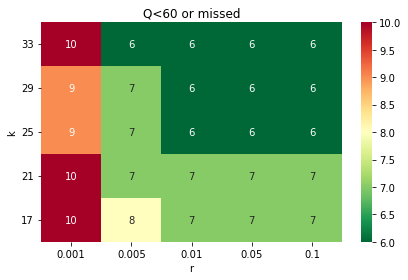

In [99]:
import re
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
np.set_printoptions(suppress=True)

def plot_SM_heatmap(df_full, index, columns, values, name, cm):
    df = df_full.pivot(index=index, columns=columns, values=values)
    fig, ax = plt.subplots(figsize=(6, 4))
    fmt = 'd' if df.iloc[:, 0].dtype.kind == 'i' else '.3g'
    sns.heatmap(df, ax=ax, annot=True, cmap=cm, fmt=fmt) #, cbar=False)
    ax.set_title(values)
    ax.set_ylabel(df.index.name)
    ax.set_xlabel(df.columns.name)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
    #fig.savefig(f'imgs/{name}.png', dpi=300)
    plt.close(fig)

def get_subdirs(eval_sketching_dir):
    return [full_dir.name for full_dir in eval_sketching_dir.glob('shmap-*')]

def add_params_to_columns(df):
    for row in df.index:
        params = row.split('-')
        d = { param[0]: param[1:] for param in params[1:] }
        for key, value in d.items():
            df.loc[row, key] = value
    df['Q<60 or missed'] = df['Q<60 or missed'].str.rstrip('%').astype(float).astype(int)
    df['Wrong Q60'] = df['Wrong Q60'].astype(int)
    df['Index [sec]'] = df['Index [sec]'].astype(float)
    df['Map [sec]'] = df['Map [sec]'].astype(float)
    df['Memory [GB]'] = df['Memory [GB]'].astype(float)
    df['k'] = df['k'].astype(int)
    df['r'] = df['r'].astype(float)
    df['t'] = df['t'].astype(float)
    df['d'] = df['d'].astype(float)
    df['o'] = df['o'].astype(float)
    df['m'] = df['m'].astype(str)
    return df

eval_sketching_dir = Path('out_small/sketching')
eval_experiment_str = 'chm13-chr1-readschm13-chr1-a?-d1-l?'
tools = get_subdirs(eval_sketching_dir)

df_all = get_comparison_table(main_dir=eval_sketching_dir, refname=refname, experiment=eval_experiment_str, tools=tools).round(2)
add_params_to_columns(df_all)

plot_SM_heatmap(df_all, index='k', columns='r', values='Map [sec]', name='heatmapSM_maptime', cm='RdYlGn_r')
plot_SM_heatmap(df_all, index='k', columns='r', values='Mapped Q60', name='heatmapSM_maptime', cm='RdYlGn')
plot_SM_heatmap(df_all, index='k', columns='r', values='Q<60 or missed', name='heatmapSM_maptime', cm='RdYlGn_r')
